## **1. Business Understanding**


### **1.1 Business Objective**

Pasar mobil bekas di Arab Saudi berkembang pesat seiring dengan meningkatnya permintaan masyarakat terhadap kendaraan pribadi yang lebih ekonomis. Penjual kendaraan, baik perorangan maupun dealer, menghadapi tantangan dalam menentukan harga jual yang tepat agar tetap kompetitif namun tetap menguntungkan.

Tujuan bisnis utama dari proyek ini adalah:

- Membantu penjual dan platform jual-beli mobil dalam menetapkan harga mobil bekas yang optimal.

- Memberikan wawasan kepada pembeli mengenai kewajaran harga berdasarkan kondisi dan spesifikasi kendaraan.

### **1.2 Business Success Criteria**
Keberhasilan proyek ini akan ditentukan oleh:

- Kemampuan model dalam memprediksi harga mobil bekas dengan akurasi yang tinggi (misalnya, melalui nilai R² atau RMSE).

- Identifikasi fitur-fitur penting yang berpengaruh signifikan terhadap harga.

- Ketersediaan rekomendasi strategis berbasis data untuk pengambilan keputusan bisnis.

### **1.3 Business Constraints**
- Ketersediaan dan kualitas data mobil bekas yang terbatas atau tidak lengkap.

- Perbedaan harga yang disebabkan oleh faktor eksternal seperti lokasi, reputasi penjual, atau negosiasi tidak dapat sepenuhnya dimodelkan.

- Preferensi konsumen yang subjektif dan tidak terekam dalam data.

### **1.4 Problem Statement (Analytical Approach)**
Permasalahan bisnis diterjemahkan ke dalam permasalahan analitis sebagai berikut:

> "Membangun model prediktif berbasis machine learning untuk memperkirakan harga mobil bekas berdasarkan atribut seperti merek, model, tahun produksi, kilometer yang telah ditempuh, jenis bahan bakar, kondisi kendaraan, dan fitur-fitur lainnya."

### **1.5 Project Goals**
- Melakukan eksplorasi data (EDA) untuk memahami struktur dan distribusi data mobil bekas.

- Membersihkan dan menyiapkan data untuk proses modeling.

- Membangun model regresi untuk memprediksi harga mobil bekas.

- Mengevaluasi kinerja model dan menginterpretasi hasilnya untuk mendukung pengambilan keputusan bisnis.


## **2. Data Understanding**

### **Import Libraries**

In [7]:
# Import libraries needed for data understanding and data cleaning
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set display option for maximum column width
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('data_saudi_used_cars.csv')
display(df.head())
df.info()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


Dataset contains records of used cars collected from `syarah.com`, representing vehicles available for sale in Saudi Arabia. Each row provides detailed information about a specific used car, including its features and price.

| **Attribute**        | **Description**                                                    | **Data Type**   | **Values**                           |
|----------------------|--------------------------------------------------------------------|------------------|--------------------------------------|
| Type                 | Type of used car                                                   | String           | 2, 3, 300, 3008, 301, 360, 4Runner, 5, 500, 5008, 6, 911, A, A3, A4, A5, A6, A7, A8, APV, ASX, ATS, Abeka, Acadia, Accent, Accord, Altima, Armada, Attrage, Aurion, Avalanche, Avalon, Avante, Avanza, Aveo, Azera, Azkarra, B50, BT-50, Beetle, Bentayga, Blazer, Bora, Boxer, Bronco, Bus County, Bus Urvan, C, C200, C300, C5700, CC, CL, CLA, CLS, CRV, CS35, CS35 Plus, CS75, CS85, CS95, CT-S, CT4, CT5, CT6, CX3, CX5, CX7, CX9, Cadenza, Cadillac, Camargue, Camaro, Camry, Caprice, Capture, Carens, Carenz, Carnival, Cayenne, Cayenne S, Cayenne Turbo, Cayenne Turbo S, Cayman, Centennial, Cerato, Challenger, Charger, Cherokee, Ciocca, City, Civic, Coaster, Colorado, Compass, Coolray, Copper, Cores, Corolla, Corolla Cross, Countryman, Coupe, Coupe S, Cressida, Creta, Crown, Cruze, "Dmax", D-MAX, DB9, DTS, Daily, Dakota, Datsun, Defender, Delta, Discovery, Doblo, Dokker, Durango, Duster, Dyna, Dzire, E, EC7, EC8, ES, Eado, Echo, Echo Sport, Edge, Elantra, Emgrand, Envoy, Ertiga, Escalade, Expedition, Explorer, F Type, F-Pace, F150, F3, FJ, FX, Fleetwood, Flex, Fluence, Flying Spur, Focus, Furniture, Fusion, G, G70, G80, GC7, GL, GLC, GLE, GS, GS3, GTB 599 Fiorano, GX, Genesis, Ghost, Golf, Gran Max, Grand Cherokee, Grand Marquis, Grand Vitara, H1, H100, H2, H3, H6, H9, HRV, HS, Hiace, Hilux, IS, Impala, Innova, Jetta, Jimny, Juke, K5, KICKS, Kaptiva, Koleos, Kona, Koranado, L200, L300, LF X60, LS, LX, Lancer, Land Cruiser, Land Cruiser 70, Land Cruiser Pickup, Levante, Liberty, Logan, Lumina, M, MKS, MKX, MKZ, ML, Macan, Malibu, Marquis, Maxima, Maybach, Megane, Milan, Mini Van, Mohave, Montero, Montero2, Murano, Mustang, NX, Nativa, Navara, Navigator, New Yorker, Nexon, Nitro, Odyssey, Opirus, Optima, Optra, Outlander, POS24, Pajero, Panamera, Passat, Pathfinder, Patrol, Pegas, Picanto, Pick up, Pilot, Platinum, Power, Prado, Prestige, Prestige Plus, Previa, Prius, Q, Q5, Q7, QX, Quattroporte, RC, RX, RX5, RX8, Ram, Range Rover, Ranger, Rav4, Rio, Royal, Rush, S, S300, S5, S8, SEL, SL, SLK, SRT, SRX, Safari, Safrane, Savana, Sedona, Seltos, Senta fe, Sentra, Seven, Sierra, Silverado, Sonata, Sorento, Soul, Spark, Sportage, Stinger, Suburban, Sunny, Superb, Suvana, Sylvian Bus, Symbol, Tahoe, Taurus, Terios, Terrain, The 3, The 4, The 5, The 6, The 7, The M, Thunderbird, Tiggo, Tiguan, Touareg, Town Car, Trailblazer, Traverse, Tucson, Tuscani, UX, V7, VTC, Van, Van R, Vanquish, Vego, Veloster, Viano, Victoria, Vitara, Wingle, Wrangler, X, X-Terra, X-Trail, X40, X7, XF, XJ, XT5, Yaris, Yukon, Z, Z350, Z370, ZS, i40, ACTIS V80, Other (choices not included in specified categories) |
| Region               | The region where the car was offered for sale                      | String           | Abha, Al-Ahsa, Al-Baha, Al-Jouf, Al-Medina, Al-Namas, Arar, Aseer, Besha, Dammam, Hafar Al-Batin, Hail, Jazan, Jeddah, Jubail, Khobar, Makkah, Najran, Qassim, Qurayyat, Riyadh, Sabya, Sakaka, Tabouk, Taef, Wadi Dawasir, Yanbu                      |
| Make                 | Car manufacturer                                                   | String           | Aston Martin, Audi, BMW, BYD, Bentley, Cadillac, Changan, Chery, Chevrolet, Chrysler, Classic, Daihatsu, Dodge, FAW, Ferrari, Fiat, Ford, Foton, GAC, GMC, Geely, Genesis, Great Wall, HAVAL, Honda, Hummer, Hyundai, INFINITI, Isuzu, Iveco, Jaguar, Jeep, Kia, Land Rover, Lexus, Lifan, Lincoln, MG, MINI, Maserati, Mazda, Mercedes, Mercury, Mitsubishi, Nissan, Peugeot, Porsche, Renault, Rolls-Royce, SsangYong, Suzuki, Tata, Toyota, Victory Auto, Volkswagen, Zhengzhou, Škoda, Other (choices not included in specified categories)                |
| Gear_Type            | Gear type (manual or automatic)                                    | String           | Manual, Automatic                    |
| Origin               | Country of origin of the car                                       | String           | Gulf Arabic, Saudi, Other (choices not included in specified categories), Unknown (information that is not known or recorded)  |
| Options              | Features and options available for the car                         | String           | Standard (offering basic features like air conditioning and a radio), Semi Full (offering added features such as alloy wheels and an infotainment system), Full (combining all standard features with enhanced comfort and safety options like a sunroof and a rearview camera)                      |
| Year                 | Year the car was manufactured                                      | Integer          | 1963 - 2022                        |
| Engine_Size          | Engine capacity (size in liters)                                   | String           | 1 - 9                              |
| Mileage              | Number of kilometers the car has been driven                       | Integer          | 100 - 20.000.000                    |
| Negotiable           | Indicates if the price is negotiable (True) or not (False)         | Boolean          | True, False                         |
| Price                | Price of the car (in local currency SAR)                          | Float            | 0 - 850.000                         |


### **Data Summary**

Memahami struktur dan isi dataset sangatlah penting. Pemeriksaan yang menyeluruh memungkinkan kita mengidentifikasi atribut utama, seperti tipe data, nilai yang hilang, dan entri unik, yang dapat berdampak signifikan terhadap pekerjaan kita. Dengan memahami aspek-aspek ini, kita dapat merancang strategi pembersihan data dengan lebih baik, memastikan bahwa kita menangani ketidakkonsistenan atau kekosongan data. Pengetahuan dasar ini meningkatkan kualitas hasil analisis dan mendukung pengambilan keputusan yang lebih tepat pada langkah-langkah selanjutnya.

In [9]:
# Create the info DataFrame
info = pd.DataFrame({
    'type' : df.dtypes,
    'nan' : df.isna().sum(),
    'unique' : df.nunique(),
    'unique value' : df.apply(lambda x: x.unique())
    })

# Display the info DataFrame
info

,type,nan,unique,unique value
Type,object,0,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
Region,object,0,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
Make,object,0,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
Gear_Type,object,0,2,"[Manual, Automatic]"
Origin,object,0,4,"[Saudi, Gulf Arabic, Other, Unknown]"
Options,object,0,3,"[Standard, Full, Semi Full]"
Year,int64,0,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017, 2002, 2010, 2009, 2004, 2001, 1986, 2007, 1999, 2005, 1977, 1991, 2003, 1995, 2006, 1997, 1993, 1996, 2000, 1990, 1965, 1980, 1987, 1994, 1988, 1989, 1978, 2022, 1975, 1964, 1984, 1979, 1992, 1963, 1981]"
Engine_Size,float64,0,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9.0, 4.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.0, 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9, 4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7.0, 1.9, 7.5, 4.3, 6.5, 3.1, 6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7, 7.8, 3.9, 8.7, 4.9, 6.8, 8.9]"
Mileage,int64,0,1716,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 17000, 209, 340000, 30000, 71000, 85000, 500000, 290, 74715, 250, 284000, 98000, 3400, 108, 350000, 550000, 204000, 139240, 296, 105920, 187000, 10000, 18500, 292000, 280000, 270000, 345500, 110000, 247000, 55800, 92000, 27000, 600000, 307801, 62000, 38000, 89000, 137000, 422000, 208000, 11000, 245000, 500, 150000, 81000, 156000, 42000, 228000, 24000, 266000, 98100, 182000, 210800, 88000, 214000, 82808, 4000, 417970, 70000, 115, 270373, 91440, 45000, 96000, 50100, 35449, 180, 66200, 100, 349000, 168000, 105000, 130000, 212000, 139740, 256, 280, 73000, 240000, 866, 216, 183000, 148000, 4358765, 188257, 117000, 160000, ...]"
Negotiable,bool,0,2,"[True, False]"


In [10]:
# Get the shape of the DataFrame
df.shape

(5624, 11)

In [11]:
duplicates = df[df.duplicated(keep=False)]
duplicate_counts = duplicates.value_counts().reset_index(name='Count')
duplicate_counts['Count'].value_counts()

Count
2    4
Name: count, dtype: int64

In [12]:
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [13]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


## Analysis Results

- Dataset terdiri dari **5624 baris** dan **11 kolom**.
- Tidak terdapat **missing values** dalam dataset ini, namun terdapat **4 baris yang terduplikasi**.

### Tipe Data Kolom
Berdasarkan tipe datanya, kolom-kolom dalam dataset dikelompokkan sebagai berikut:

- **Object (6 kolom):**
  - `Type`, `Region`, `Brand`, `Gear_Type`, `Origin`, `Option`
- **Integer (3 kolom):**
  - `Year`, `Mileage`, `Price`
- **Float (1 kolom):**
  - `Engine_Size`
- **Boolean (1 kolom):**
  - `Negotiable`

### Temuan Penting

- **Rentang tahun mobil** (kolom `Year`) sangat besar, menunjukkan adanya perbedaan usia kendaraan yang signifikan. Perlu analisis lebih lanjut untuk memahami dampaknya terhadap kualitas data dan relevansi dalam model.
  
- **Nilai mileage maksimum** sebesar **20.000.000 km** sangat tidak wajar dan perlu dikaji ulang. Kemungkinan ada kesalahan pencatatan atau input data.

- **Engine size** hingga **9 liter** cukup tinggi. Perlu ditinjau apakah nilai tersebut valid.

- Di kolom `Price`, terdapat nilai **0 SAR** dan **1 SAR** yang tidak masuk akal untuk harga mobil. Perlu ditelusuri apakah ini kesalahan data atau outlier yang sah.


In [14]:
check = df[df['Negotiable']==True]
check['Price'].value_counts()

Price
0    1796
Name: count, dtype: int64

## **3. Exploratory Data Analysis (EDA)**

Analisis Data Eksploratif (EDA) merupakan langkah penting untuk memahami dataset. Dalam analisis ini, kita akan fokus pada kolom numerik dan kategorikal untuk mengeksplorasi hubungannya dengan kolom Price. Dengan menganalisis elemen-elemen tersebut, kita dapat mengidentifikasi faktor-faktor yang memengaruhi harga, memahami pola distribusi, serta menemukan potensi outlier.

In [15]:
category_columns = ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Negotiable']
numerical_columns = ['Year', 'Mileage','Engine_Size', 'Price']

### **3.1. EDA Catagorical Variable**

In [16]:
for col in category_columns:
    print(col)
    display(df[col].value_counts())

Type


Type
Land Cruiser    269
Camry           234
Hilux           207
Accent          174
Yukon           162
               ... 
Nativa            1
360               1
GC7               1
CT5               1
S8                1
Name: count, Length: 347, dtype: int64

Region


Region
Riyadh            2272
Dammam             925
Jeddah             733
Qassim             225
Al-Medina          214
Al-Ahsa            166
Aseer              163
Makkah             153
Taef               103
Tabouk              97
Khobar              76
Abha                64
Jazan               60
Hail                58
Jubail              56
Najran              42
Hafar Al-Batin      39
Al-Baha             35
Yanbu               27
Al-Jouf             27
Arar                22
Besha               16
Qurayyat            13
Al-Namas            12
Wadi Dawasir        12
Sakaka              10
Sabya                4
Name: count, dtype: int64

Make


Make
Toyota          1431
Hyundai          670
Ford             530
Chevrolet        458
Nissan           387
GMC              282
Kia              251
Mercedes         226
Lexus            222
Mazda            129
Honda            115
BMW               97
Dodge             95
Mitsubishi        94
Land Rover        79
Jeep              56
Chrysler          50
Audi              38
Changan           36
Renault           35
Cadillac          31
Genesis           31
Isuzu             25
Geely             24
Volkswagen        23
Porsche           22
MG                21
Suzuki            16
Lincoln           16
INFINITI          15
HAVAL             14
MINI              11
Other             10
Daihatsu           9
Jaguar             9
Mercury            9
Peugeot            8
Fiat               7
Hummer             5
Bentley            4
Great Wall         4
FAW                4
Rolls-Royce        3
Maserati           3
GAC                3
Foton              2
Zhengzhou          2
Aston Ma

Gear_Type


Gear_Type
Automatic    4875
Manual        749
Name: count, dtype: int64

Origin


Origin
Saudi          4188
Gulf Arabic     697
Other           678
Unknown          61
Name: count, dtype: int64

Options


Options
Full         2233
Standard     1822
Semi Full    1569
Name: count, dtype: int64

Negotiable


Negotiable
False    3828
True     1796
Name: count, dtype: int64

### Countplot

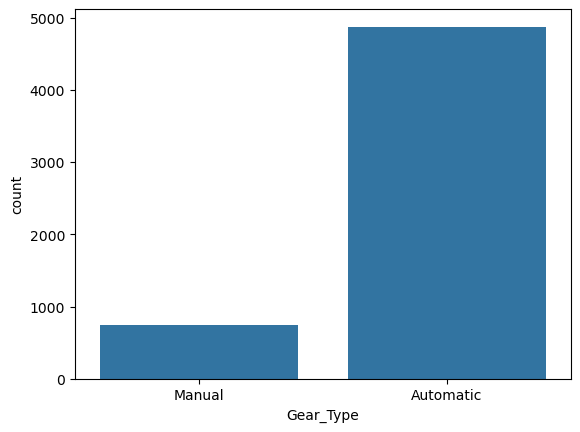

In [17]:
sns.countplot(data=df, x='Gear_Type')
plt.show()

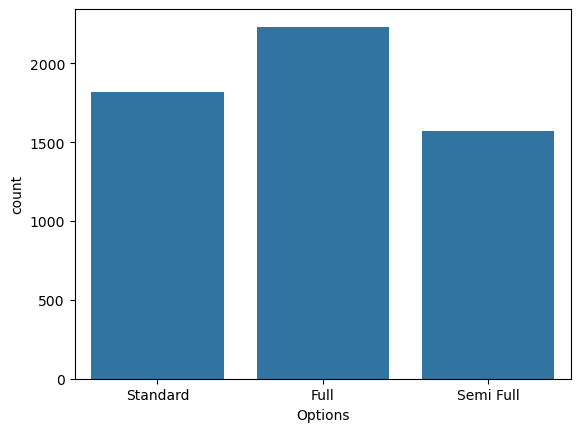

In [18]:
sns.countplot(data=df, x='Options')
plt.show()

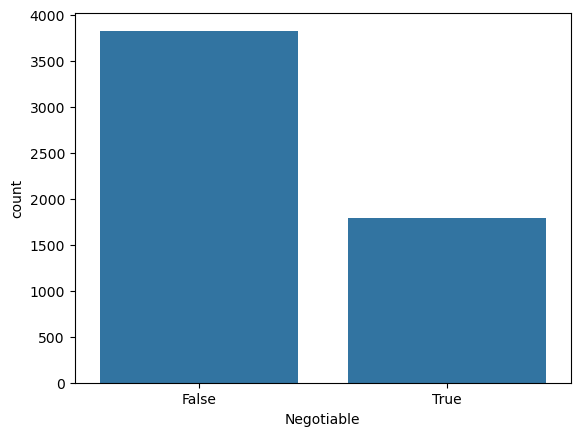

In [19]:
sns.countplot(data=df, x='Negotiable')
plt.show()

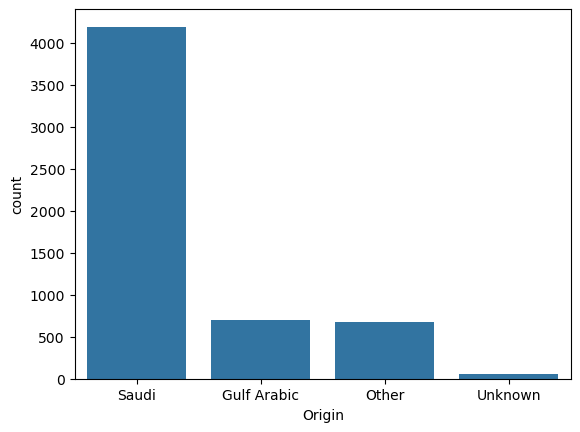

In [20]:
sns.countplot(data=df, x='Origin')
plt.show()

### Histogram

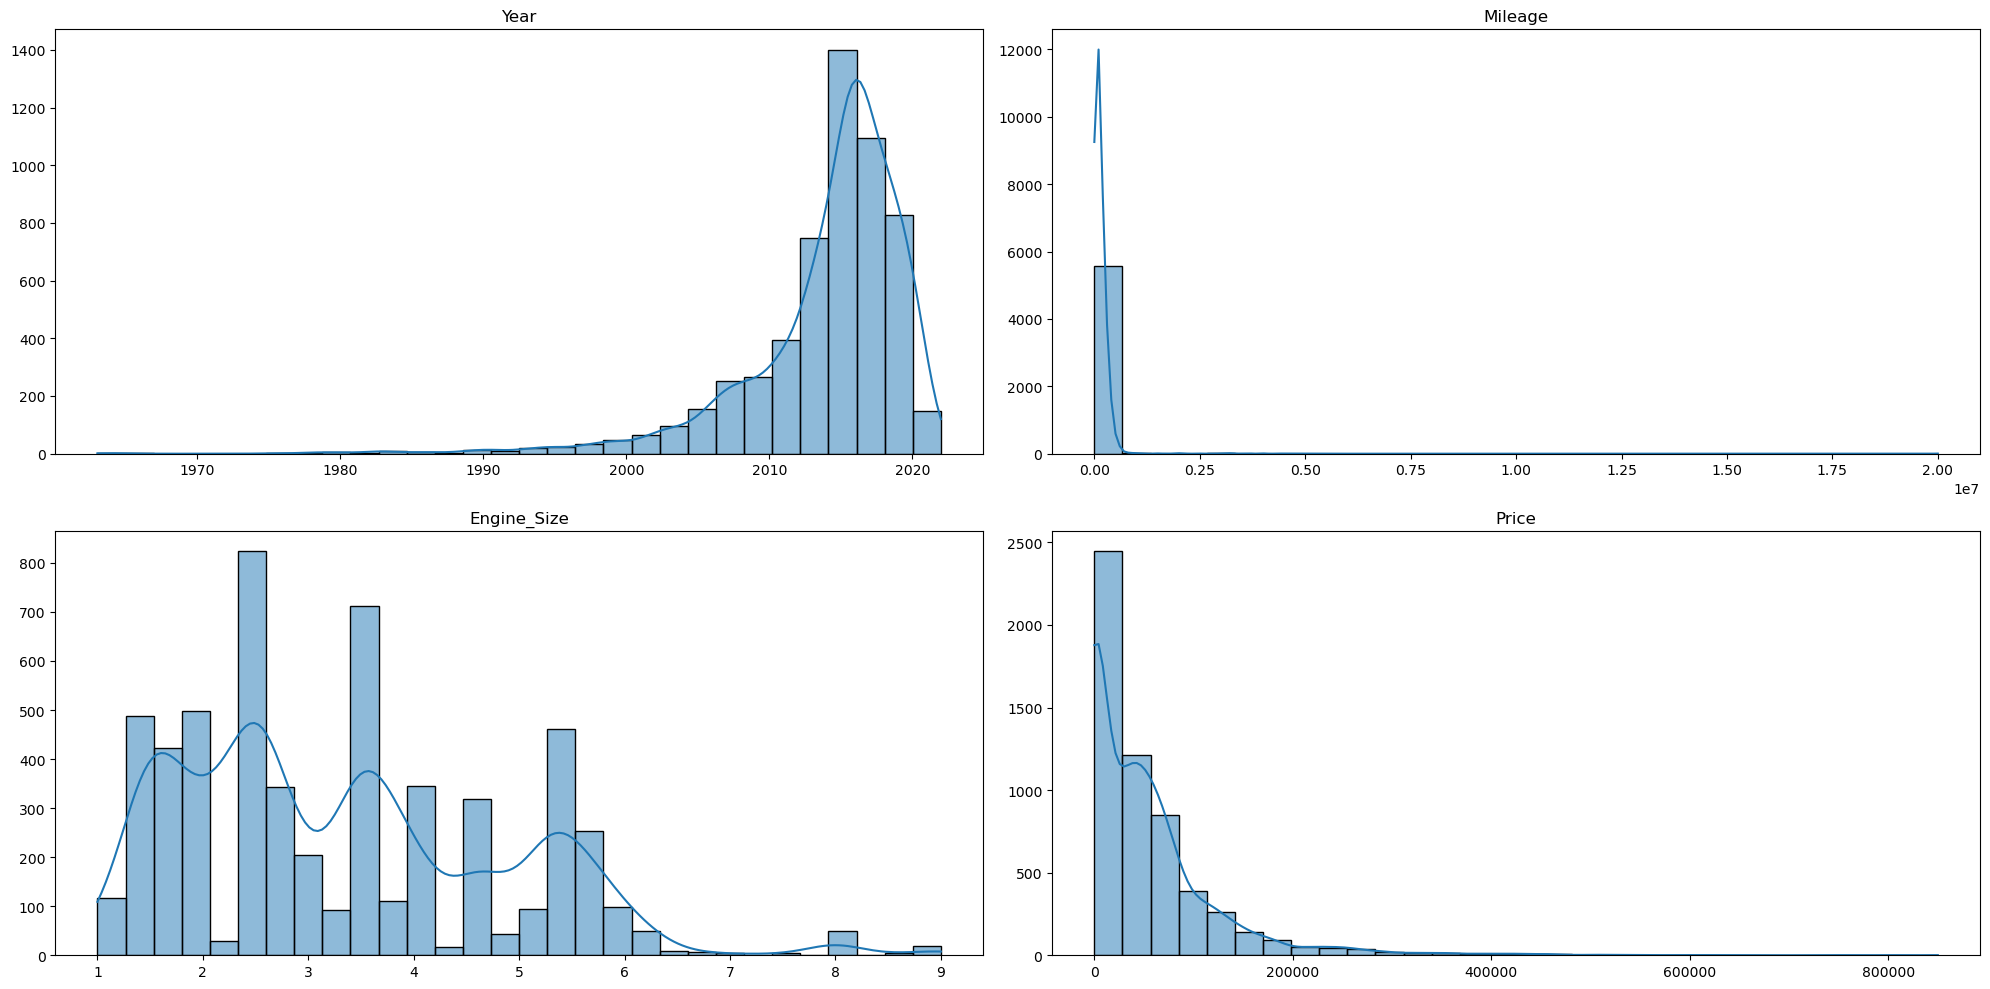

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

## Interpretasi Visualisasi Histogram Fitur Numerik

---

### 1. **Year (Tahun Produksi Mobil)**

- Distribusi sangat tidak merata dan **condong ke kanan** (right-skewed), dengan puncak jumlah mobil pada tahun **2012 hingga 2020**.
- Hal ini menunjukkan bahwa sebagian besar mobil bekas yang dijual adalah mobil dengan umur <10 tahun.
- Mobil dari sebelum tahun 2000 sangat jarang dijual, kemungkinan karena tidak layak pakai atau kurang diminati pasar.

---

### 2. **Mileage (Kilometer Tempuh)**

- Distribusi **sangat skewed ke kanan** dengan mayoritas mobil memiliki jarak tempuh di bawah **250.000 km**.
- Terdapat sejumlah **outlier ekstrem** (hingga ~20 juta km) yang kemungkinan besar merupakan **kesalahan input atau noise data**.
- Data perlu dibersihkan atau di-*filter* untuk menjaga kualitas analisis.

---

### 3. **Engine Size (Ukuran Mesin)**

- Terlihat beberapa puncak yang umum digunakan pada mobil seperti **1.6L, 2.0L, 3.0L, 4.0L, dan 5.7L**.
- Distribusi mencerminkan segmentasi produk (mobil kecil, SUV, sport car, dll).
- Nilai ekstrim (di atas 8.0L) jarang dan kemungkinan dari mobil sport atau kendaraan khusus.

---

### 4. **Price (Harga Mobil Bekas)**

- Harga sangat **right-skewed**, mayoritas mobil dijual dengan harga **< 100.000 SAR**.
- Terdapat **outlier** hingga **800.000 SAR ke atas**, kemungkinan dari merek mewah seperti Rolls-Royce, Lamborghini, dll.
- Menunjukkan **rentang harga yang sangat lebar** di pasar mobil bekas Arab Saudi.

---

### Kesimpulan Umum

- Fitur `price` dan `mileage` mengandung **outlier** yang perlu ditangani sebelum modeling.
- `year` dan `engine_size` menunjukkan pola yang mencerminkan tren umum pasar.
- Visualisasi histogram ini membantu kita memahami struktur distribusi dan melakukan strategi pembersihan data yang tepat.


### Boxplot

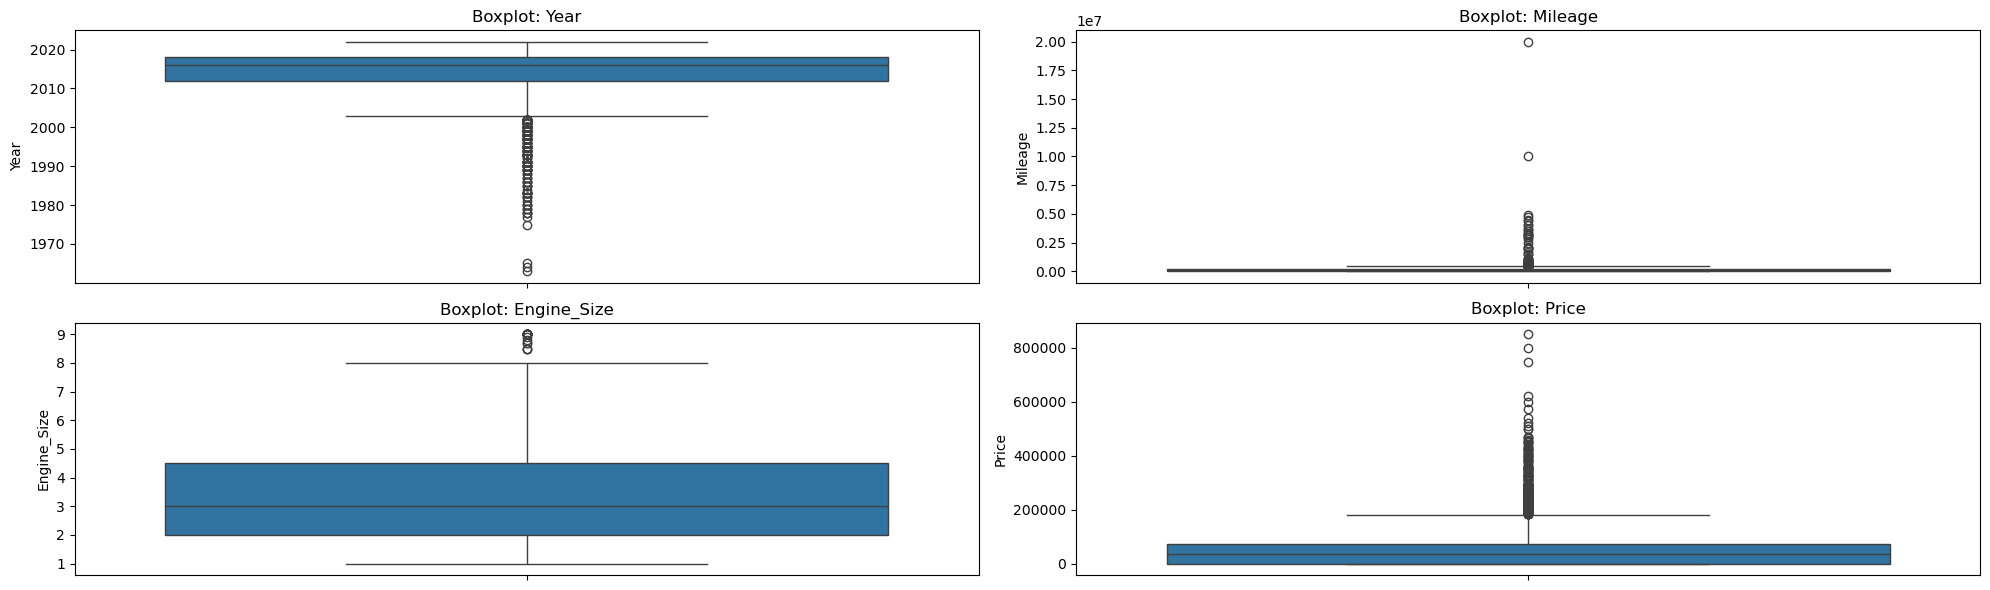

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))

axes = axes.flatten()

for i, col in enumerate(numerical_columns[:4]):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot: {col}")

plt.tight_layout()
plt.show()

## Interpretasi Visualisasi Boxplot Fitur Numerik

---

### 1. **Year (Tahun Produksi Mobil)**

- Distribusi tahun menunjukkan **sejumlah outlier** pada mobil yang diproduksi sebelum tahun 2000.
- Rentang utama (interquartile range) terfokus antara tahun **2012–2020**, menunjukkan tren dominasi mobil baru.
- Outlier dapat dipertimbangkan untuk dihapus atau dianalisis lebih lanjut untuk keperluan segmentasi khusus (kolektor, vintage, dll).

---

### 2. **Mileage (Kilometer Tempuh)**

- Terdapat **banyak outlier ekstrem** yang sangat jauh dari batas atas (hingga >15 juta km).
- Rentang interkuartil menunjukkan bahwa sebagian besar mobil memiliki jarak tempuh relatif rendah.
- **Distribusi tidak simetris**, menandakan bahwa mayoritas mobil cenderung masih dalam kondisi wajar dari segi penggunaan, tapi ada sejumlah data yang perlu ditinjau validitasnya.

---

### 3. **Engine Size (Ukuran Mesin)**

- Beberapa **outlier terlihat pada ukuran mesin besar** (>5.0L), kemungkinan merupakan mobil sport, SUV besar, atau kendaraan niaga.
- Rentang utama terkonsentrasi antara **1.5L hingga 4.0L**, yang umum pada mobil pribadi di pasaran.
- Data ini dapat digunakan untuk menentukan segmentasi kelas kendaraan berdasarkan ukuran mesin.

---

### 4. **Price (Harga Mobil)**

- Banyak **outlier teridentifikasi di atas 200.000 SAR**, bahkan mencapai >800.000 SAR.
- Harga mobil secara umum terkonsentrasi di bawah **100.000 SAR**, menunjukkan pasar mobil bekas terfokus pada segmen menengah ke bawah.
- Outlier pada fitur `price` sangat penting diperiksa, karena bisa jadi merupakan mobil mewah atau kesalahan entri data.

---

### Kesimpulan Umum

- Hampir semua fitur numerik memiliki **outlier signifikan**, terutama `Mileage` dan `Price`.
- Boxplot sangat membantu dalam mendeteksi nilai-nilai ekstrem dan memvalidasi distribusi yang terlihat pada histogram sebelumnya.
- Perlu dilakukan pembersihan data lebih lanjut seperti:
  - Filtering atau transformasi untuk outlier ekstrem.
  - Winsorizing jika data tidak ingin dibuang, namun tetap ingin distandarisasi.


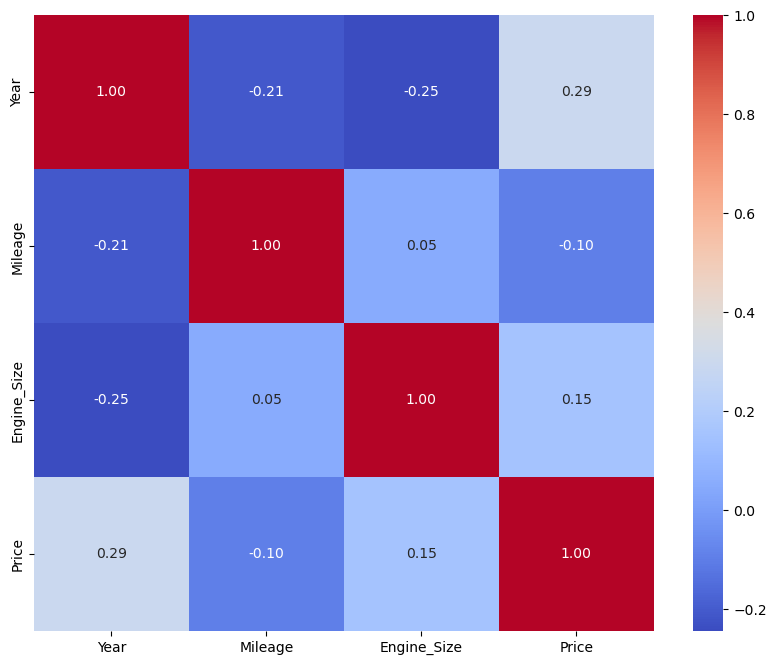

In [25]:
numeric = df[numerical_columns]
cor = numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## Interpretasi Visualisasi Korelasi (Heatmap)

Visualisasi berikut menampilkan matriks korelasi antar fitur numerik menggunakan skala warna (color scale) dari biru (negatif) ke merah (positif). Nilai korelasi berkisar dari -1 (berlawanan sempurna) hingga 1 (searah sempurna).

---

### Korelasi Antar Fitur

- **Year dan Price**: korelasi **positif moderat** sebesar `0.29`
  - Mobil yang lebih baru cenderung memiliki harga lebih tinggi, sesuai dengan ekspektasi pasar.
  
- **Year dan Engine Size**: korelasi **negatif ringan** sebesar `-0.25`
  - Mobil yang lebih baru cenderung memiliki ukuran mesin yang lebih kecil, mungkin karena tren efisiensi bahan bakar.

- **Year dan Mileage**: korelasi **negatif ringan** sebesar `-0.21`
  - Mobil yang lebih baru cenderung memiliki jarak tempuh lebih rendah, seperti yang diharapkan.

- **Mileage dan Price**: korelasi **negatif lemah** sebesar `-0.10`
  - Semakin tinggi kilometer tempuh, harga mobil cenderung lebih rendah — meskipun hubungan ini tidak terlalu kuat.

- **Engine Size dan Price**: korelasi **positif lemah** sebesar `0.15`
  - Mobil dengan mesin lebih besar cenderung memiliki harga lebih tinggi, meski hubungan ini tidak dominan.

- **Mileage dan Engine Size**: korelasi hampir **netral** sebesar `0.05`
  - Ukuran mesin tidak banyak berpengaruh terhadap kilometer tempuh dalam dataset ini.

---

### Kesimpulan Korelasi

- Tidak ada hubungan linear yang sangat kuat antar fitur.
- Beberapa korelasi lemah namun logis secara domain knowledge:
  - **Tahun lebih baru → harga lebih tinggi, kilometer lebih rendah**
  - **Mesin lebih besar → harga lebih tinggi (walaupun tidak signifikan)**
- Heatmap ini berguna untuk:
  - Menghindari multikolinearitas pada model prediktif.
  - Menentukan fitur yang berpotensi digunakan dalam model regresi atau klasifikasi.

---

**Catatan**: Korelasi ini hanya mengukur hubungan linear. Untuk pola non-linear atau pengaruh kategorikal, eksplorasi lanjutan diperlukan.


## **4. Data Pre-Processing**

🔍 Tangani Missing Values
Mencegah error dan bias saat pelatihan model.

🧹 Hilangkan Outlier
Agar model tidak terdistraksi oleh data ekstrem.

🔡 Encoding Data Kategorikal
Ubah data teks jadi angka agar bisa dibaca model.

📏 Normalisasi / Standardisasi
Menyamakan skala fitur agar model bekerja optimal.

🔍 Seleksi & Rekayasa Fitur
Pilih fitur paling relevan dan buat fitur baru yang bermakna.

✅ Tingkatkan Akurasi Model
Data bersih = hasil prediksi lebih akurat dan andal.

“Garbage In, Garbage Out”
Tanpa data pre-processing, bahkan model terbaik pun akan gagal memberikan hasil yang baik.

In [27]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
236,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
540,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
2012,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
3631,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


In [153]:
df_clean = df.drop_duplicates()

### **4.1. Handling Outliers**

In [154]:
from sklearn.preprocessing import PowerTransformer

def cap_outliers_percentile(series, lower=0.005, upper=0.995):
    lower_bound = series.quantile(lower)
    upper_bound = series.quantile(upper)
    return series.clip(lower=lower_bound, upper=upper_bound)

# Capping
df['Year'] = cap_outliers_percentile(df['Year'], 0.005, 0.995)
df['Mileage'] = cap_outliers_percentile(df['Mileage'], 0.005, 0.995)

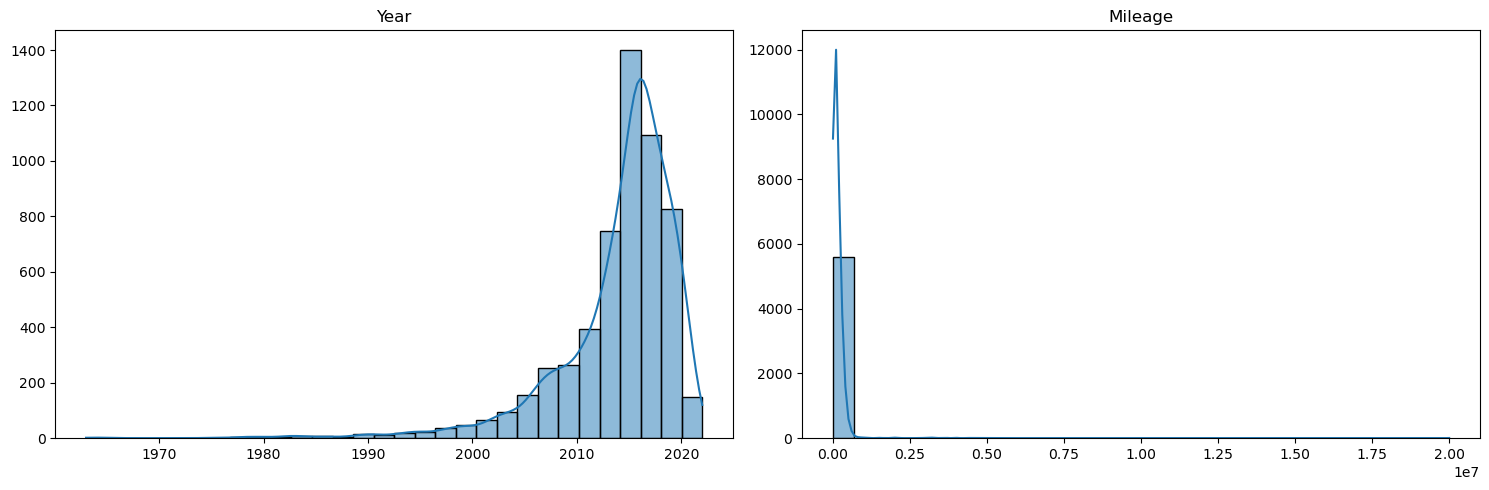

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
outlier_columns = ['Year', 'Mileage']
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(outlier_columns):
    sns.histplot(df[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [156]:
for col in outlier_columns:
    df[col] = np.log1p(df[col])  # log1p handles zero safely

df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,7.607878,1.4,12.950390,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,7.608374,8.0,11.289794,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,7.608871,5.0,11.849405,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,7.608871,2.4,12.301387,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,7.611348,4.0,10.799596,True,0


In [157]:
df_final = df.copy()

### **4.2. Encoding**

- Type, Region, Make
    - Encoding Method: Frequency Encoding. Because of High Cardianity

- Gear_Type
    - Encoding Method: Ordinal Encoding

- Options
    - Encoding Method: Ordinal Encoding

- Origin
    - Encoding Method: Onehot Encoding

- Negotiable
    - Encoding Method: Ordinal Encoding

In [158]:
#Ordinal Encoding
gear = {'Manual': 0, 'Automatic': 1}
df_final['Gear_Type_Encoded'] = df_final['Gear_Type'].map(gear)

options ={'Standard':0, 'Semi Full':1, 'Full':2}
df_final['Options_Encoded'] = df_final['Options'].map(options)


origin = {'Saudi': 'Saudi', 'Gulf Arabic' : 'Gulf_Arabic', 'Unknown' : 'Other', 'Other' : 'Other' }
df_final['Origin_Encoded'] = df_final['Origin'].map(origin)

df_final['Origin_Encoded'].value_counts()

#One Hot Encoding
df_final = pd.get_dummies(df_final, columns=['Origin_Encoded'], prefix='Origin', drop_first=True)

#Frequency Encoding
freq_map = df_final['Type'].value_counts(normalize=True).to_dict()
df_final['Type_Encoded'] = df_final['Type'].map(freq_map)

freq_map = df_final['Make'].value_counts(normalize=True).to_dict()
df_final['Make_Encoded'] = df_final['Make'].map(freq_map)

freq_map = df_final['Region'].value_counts(normalize=True).to_dict()
df_final['Region_Encoded'] = df_final['Region'].map(freq_map)

## Encoding – Interpretasi Proses

Dalam tahap pra-pemrosesan data, berbagai fitur kategorikal telah di-*encode* menggunakan metode yang disesuaikan dengan karakteristik masing-masing fitur. Tujuannya adalah agar data dapat digunakan dalam algoritma machine learning yang hanya bisa bekerja dengan nilai numerik. Berikut penjelasan lengkapnya:

---

### 1. Gear_Type
- **Jenis Encoding:** Ordinal Encoding
- **Alasan:** Terdapat dua kategori ('Manual' dan 'Automatic') yang memiliki urutan logis.
- **Mapping:** 
  - 'Manual' → 0
  - 'Automatic' → 1

---

### 2. Options
- **Jenis Encoding:** Ordinal Encoding
- **Alasan:** Kategori memiliki tingkatan tertentu ('Standard', 'Semi Full', 'Full').
- **Mapping:**
  - 'Standard' → 0
  - 'Semi Full' → 1
  - 'Full' → 2

---

### 3. Origin
- **Jenis Encoding:** One-Hot Encoding
- **Alasan:** Tidak ada urutan logis dan jumlah kategorinya tidak terlalu banyak.
- **Proses:**
  - Nilai awal seperti 'Saudi', 'Gulf Arabic', 'Unknown', dll.
  - Disederhanakan menjadi tiga kolom biner (`Origin_Saudi`, `Origin_Other`, dst) dengan `drop_first=True` untuk menghindari multikolinearitas.

---

### 4. Type, Region, Make
- **Jenis Encoding:** Frequency Encoding
- **Alasan:** Memiliki **high cardinality** (jumlah kategori besar), sehingga:
  - One-hot encoding akan menciptakan terlalu banyak fitur dan meningkatkan kompleksitas model.
- **Proses:**
  - Menghitung proporsi kemunculan setiap kategori di kolom (`value_counts(normalize=True)`).
  - Mengubah kategori menjadi nilai berdasarkan frekuensinya.

---

### 5. Negotiable
- **Jenis Encoding:** Ordinal Encoding
- **Asumsi:** Fitur ini kemungkinan berupa nilai boolean ('Yes' / 'No') atau kategori bernilai ordinal.
- **(Catatan):** Encoding eksplisit untuk fitur ini tidak ditampilkan dalam potongan kode, tapi sudah dicatat dalam dokumentasi di atas sebagai ordinal.

---

## Kesimpulan
- Pemilihan metode encoding yang tepat **sangat penting** untuk menjaga performa dan efisiensi model.
- Dengan menghindari One-Hot untuk fitur dengan banyak kategori, dan menggunakan Frequency Encoding, proses ini telah mempertimbangkan risiko **curse of dimensionality**.
- One-Hot Encoding tetap digunakan untuk fitur yang memiliki sedikit kategori dan tidak memiliki hubungan ordinal.


### **4.3. Scaling**

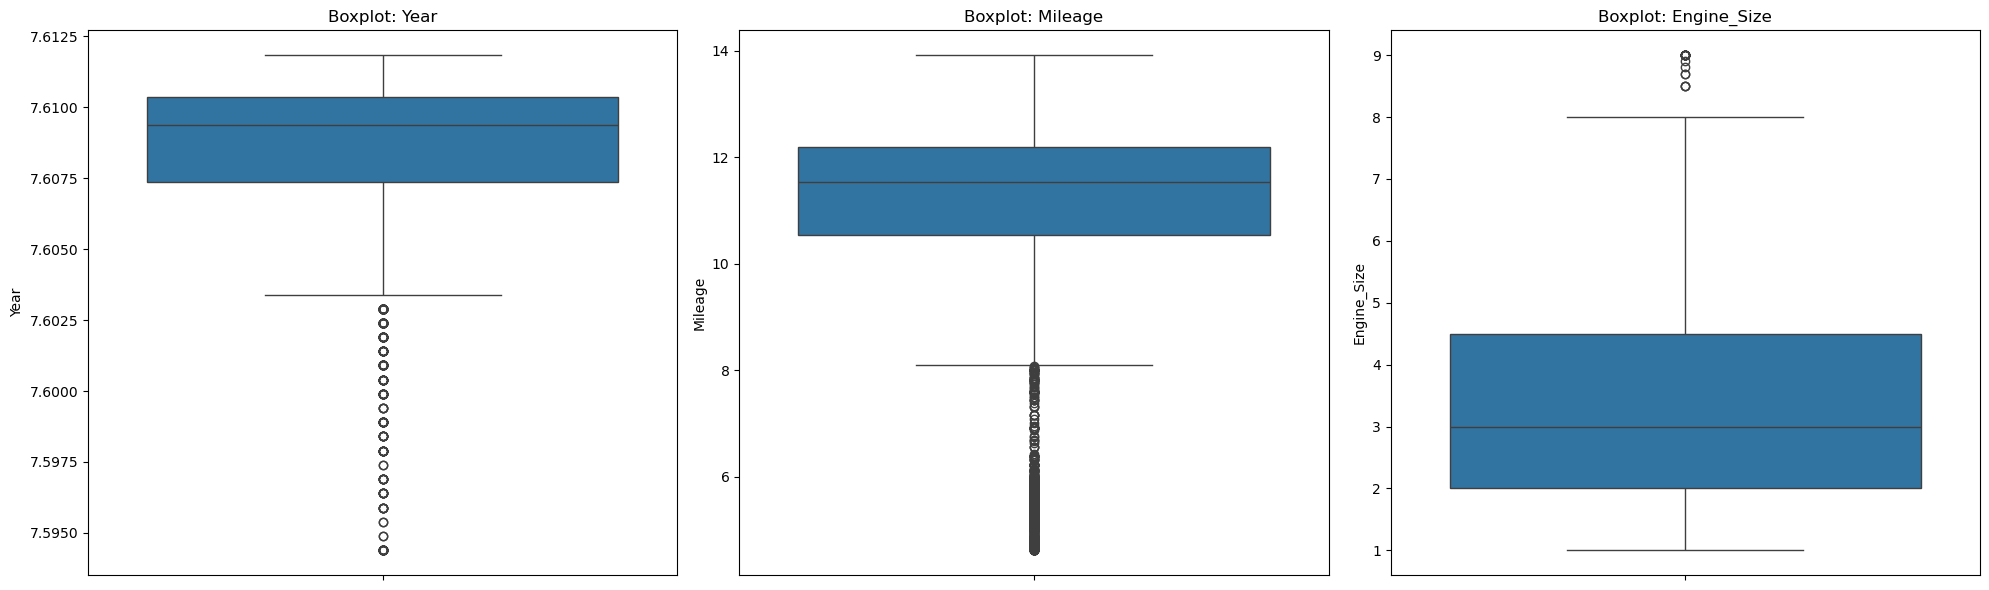

In [159]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
boxplot_columns= ['Year', 'Mileage', 'Engine_Size']
axes = axes.flatten()

for i, col in enumerate(boxplot_columns):
    sns.boxplot(y=df_final[col], ax=axes[i])
    axes[i].set_title(f"Boxplot: {col}")

plt.tight_layout()
plt.show()

## 📦 Boxplot Hasil Scaling – Interpretasi

Visualisasi di atas menunjukkan distribusi tiga fitur numerik (`Year`, `Mileage`, dan `Engine_Size`) setelah proses **scaling** (kemungkinan besar menggunakan log transformation atau scaler seperti `StandardScaler` / `MinMaxScaler`). Berikut interpretasinya:

---

### 📌 1. Year
- **Distribusi sangat rapat** dengan sedikit sekali variasi, menunjukkan bahwa sebagian besar kendaraan berasal dari tahun yang relatif berdekatan.
- Terlihat adanya beberapa **outlier di bawah** (tahun lebih lama), namun masih dalam batas yang wajar.
- Skala data sangat kecil (sekitar 7.6), yang menandakan kemungkinan data ini telah melalui proses **log transformasi** atau **normalisasi**.

---

### 📌 2. Mileage
- **Distribusi lebih lebar**, menunjukkan variasi yang cukup besar dalam jarak tempuh kendaraan.
- Terlihat banyak **outlier di sisi bawah** (kendaraan dengan jarak tempuh sangat rendah), kemungkinan merupakan mobil baru atau sangat jarang digunakan.
- Persebaran data cukup simetris setelah scaling.

---

### 📌 3. Engine Size
- Fitur ini memiliki **banyak outlier di sisi atas**, yang mengindikasikan beberapa kendaraan memiliki ukuran mesin sangat besar dibandingkan mayoritas mobil.
- Data terdistribusi miring ke kanan (**right-skewed**) sebelum scaling, dan meskipun sudah distandarisasi, efek skewness masih terlihat.

---

### 🔍 Kesimpulan Scaling
- **Scaling berhasil merapikan distribusi data**, terutama untuk fitur yang memiliki rentang nilai besar seperti `Mileage` dan `Engine_Size`.
- Outlier tetap terlihat karena scaling tidak menghapusnya, namun bisa membantu model agar tidak terlalu bias terhadap nilai ekstrem.
- Boxplot ini juga membantu mengidentifikasi potensi fitur yang mungkin perlu perlakuan khusus (misalnya, penanganan outlier atau transformasi lanjutan).

> Visualisasi ini penting sebagai tahap validasi bahwa data sudah berada dalam rentang yang cocok untuk digunakan dalam modeling, terutama untuk model berbasis regresi atau distance-based seperti KNN.


In [160]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
columns_to_scale = boxplot_columns
df_final[columns_to_scale] = scaler.fit_transform(df_final[columns_to_scale])

In [174]:
df_final = df_final[df_final['Price'] > 10000]

## **5. Modeling**

🔧 Membangun Hubungan Data–Target
Modeling membantu kita memahami dan memetakan hubungan antara fitur (input) dan target (output).

🎯 Prediksi dan Estimasi
Tanpa model, kita tidak bisa memprediksi nilai baru dari data yang belum pernah dilihat sebelumnya.

📈 Evaluasi Performa
Modeling memungkinkan pengujian dan perbandingan berbagai algoritma untuk memilih yang terbaik.

🔁 Optimasi dan Iterasi
Proses modeling membuka ruang untuk tuning, validasi silang, dan perbaikan berkelanjutan.

📊 Dasar untuk Pengambilan Keputusan
Model yang baik → insight yang bisa diandalkan untuk keputusan bisnis.

⚠️ Tanpa Modeling, tidak ada Machine Learning!
Data saja tidak cukup — modellah yang menjadikannya berguna.

In [175]:
columns_to_drop = ['Type', 'Make', 'Region', 'Gear_Type', 'Options', 'Origin','Negotiable']
df_new = df_final.drop(columns=columns_to_drop)

In [176]:
df_new.head()

,Year,Engine_Size,Mileage,Price,Gear_Type_Encoded,Options_Encoded,Origin_Other,Origin_Saudi,Type_Encoded,Make_Encoded,Region_Encoded
1,-0.333333,2.00,-0.154037,120000,1,2,False,True,0.028805,0.050142,0.403983
2,-0.166625,0.80,0.187083,260000,1,2,False,False,0.013336,0.014047,0.403983
3,-0.166625,-0.24,0.462597,42000,1,1,False,True,0.007824,0.044630,0.006935
5,0.499380,-0.40,-0.863040,58000,1,1,False,True,0.001422,0.022937,0.011380
6,-0.666997,0.72,0.370016,85000,1,2,False,True,0.000711,0.003912,0.403983


### 5.1. Persiapan Data
Sebelum membangun model, dilakukan pemrosesan data sebagai berikut:

- Beberapa kolom yang dianggap tidak relevan atau memiliki redundansi dihapus, seperti Type, Make, Region, Gear_Type, Options, Origin, dan Negotiable.

- Data dibagi menjadi fitur independen (X) dan target (y), yaitu kolom Price.

- Dataset dipecah menjadi data latih dan data uji menggunakan train_test_split dengan rasio 80:20.

In [177]:
from sklearn.model_selection import train_test_split

# Define X dan y
X = df_new.drop(columns=['Price'])
y = df_new['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.2. Pemrosesan Fitur
Semua fitur dalam X diubah menjadi numerik. Fitur bertipe boolean atau object dikonversi menjadi integer. Hal ini penting karena sebagian besar algoritma machine learning memerlukan input numerik.

In [178]:
# Ensure all columns in X are numeric (convert booleans to int, for example)
X = X.copy()
for col in X.columns:
    if X[col].dtype == 'bool' or X[col].dtype == 'object':
        X[col] = X[col].astype(int)


### 5.3. Seleksi Fitur (Feature Selection)
Metode Backward Elimination digunakan dengan model OLS (Ordinary Least Squares) dari statsmodels:

- Fitur yang memiliki nilai p di atas 0.05 (tidak signifikan secara statistik) dihapus satu per satu.

- Proses berlanjut hingga semua fitur yang tersisa signifikan pada tingkat kepercayaan 95%.

- Hasilnya adalah subset fitur yang paling berkontribusi dalam memprediksi Price.

In [179]:
import statsmodels.api as sm 

def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)
    while len(features) > 0:
        X_selected = sm.add_constant(X[features])
        model = sm.OLS(y, X_selected).fit()
        p_values = model.pvalues.iloc[1:]
        max_p_value = p_values.max()

        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break

    return features

selected_features_be = backward_elimination(X, y)
print("Selected Features (Backward):", selected_features_be)

Selected Features (Backward): ['Year', 'Engine_Size', 'Mileage', 'Gear_Type_Encoded', 'Options_Encoded', 'Origin_Other', 'Origin_Saudi', 'Type_Encoded', 'Make_Encoded', 'Region_Encoded']


### 5.4. Model yang Diuji
Tiga model utama dievaluasi:

- ElasticNet: Model regresi linear regularisasi kombinasi L1 dan L2.

- Random Forest Regressor: Model ensemble berbasis decision trees.

- XGBoost Regressor: Model boosting yang populer untuk performa tinggi.

In [180]:
# ensemble similar type
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet

models_explored = {
    "ElasticNet": ElasticNet,
   "RandomForest": RandomForestRegressor,
    "XGBoost": XGBRegressor,
  }
search_space = {
    'ElasticNet': {
        'alpha': [0.1,0.5,1.0], 
        'l1_ratio': [0.1,0.5,0.9],
        'tol': [1e-4, 0.1],
    },
    'RandomForest': {
        'max_depth': [2, 5,10],
        'min_samples_split': [2,4,6],
        'bootstrap': [False, True],
    },
    'XGBoost': {
        'learning_rate': [0.001, 0.01, 0.1],
        'gamma': [0.01, 0.5],
        'subsample': [0.6, 0.8, 1.0],
    },}

### 5.5. Tuning Hyperparameter
- Dilakukan Grid Search CV (cross-validation 5-fold) untuk mencari kombinasi hyperparameter terbaik bagi setiap model.

- Parameter yang dituning mencakup aspek penting seperti alpha, l1_ratio, max_depth, learning_rate, dll, tergantung modelnya.

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error

results = {}
for model_name, model_class in models_explored.items():
  print(f"Model: {model_name}")
  search_params = search_space.get(model_name)
  model = model_class()
  grid_search = GridSearchCV(estimator=model, param_grid=search_params, cv=5, scoring='neg_mean_squared_error')
  grid_search.fit(X_train, y_train)
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print(f"RMSE {model_name}: {rmse}")
  results[model_name] = {'Best Params': grid_search.best_params_, 'Validation RMSE': rmse,'Best Model':best_model}

Model: ElasticNet
RMSE ElasticNet: 56019.783301958494
Model: RandomForest
RMSE RandomForest: 29625.296558014797
Model: XGBoost
RMSE XGBoost: 28971.826946784407


### 5.6. Evaluasi Model
Metrik utama yang digunakan adalah Root Mean Squared Error (RMSE) pada data uji (X_test).

Setelah training dan tuning:

- Model terbaik dari hasil tuning digunakan untuk melakukan prediksi di X_test.

- Dihitung nilai RMSE pada hasil prediksi.

Kemudian, dilakukan evaluasi kembali pada data latih (X_train) tetapi hanya menggunakan fitur yang dipilih melalui backward elimination, untuk mengukur performa training model secara lebih spesifik pada fitur penting.

In [182]:
for model_name, model_class in models_explored.items():
    model = results[model_name]['Best Model']
    y_pred = model.predict(X_train[selected_features_be])
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    print(f"RMSE validation {model_name}: {results[model_name]['Validation RMSE']}")
    print(f"RMSE training {model_name}: {rmse}")

RMSE validation ElasticNet: 56019.783301958494
RMSE training ElasticNet: 58135.13360876405
RMSE validation RandomForest: 29625.296558014797
RMSE training RandomForest: 19362.505201225373
RMSE validation XGBoost: 28971.826946784407
RMSE training XGBoost: 13127.006389334476


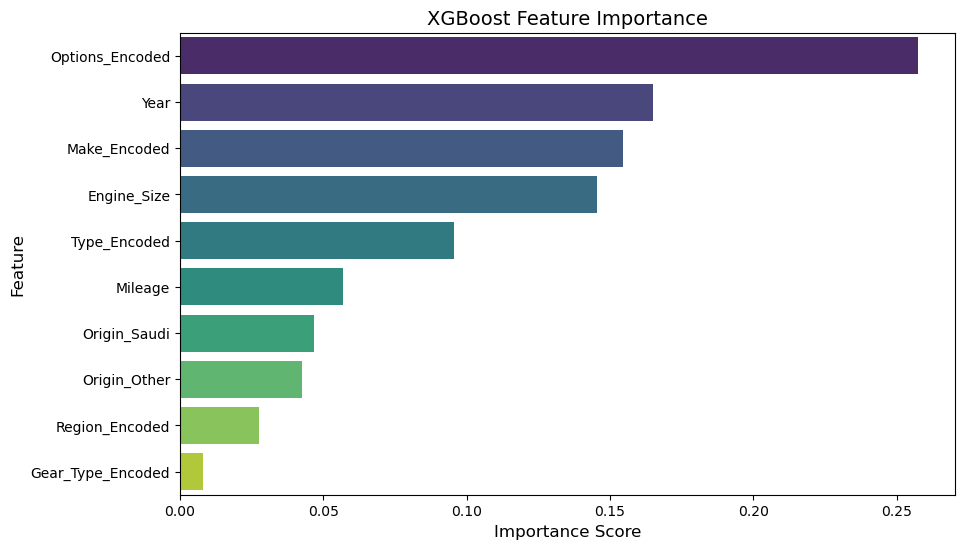

In [185]:
best_model = results['XGBoost']['Best Model']

feature_importance = best_model.feature_importances_

# Create DataFrame for visualization
feature_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)


# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df, palette="viridis")
plt.title("XGBoost Feature Importance", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

## 📊 XGBoost Feature Importance – Interpretasi

Grafik di atas menampilkan **importance score** setiap fitur dalam model XGBoost untuk memprediksi harga kendaraan. Semakin tinggi skor, semakin besar kontribusi fitur tersebut terhadap prediksi model.

---

### 🔝 Fitur Paling Penting

| Ranking | Fitur              | Penjelasan                                                                 |
|--------:|--------------------|----------------------------------------------------------------------------|
| 1️⃣     | `Options_Encoded`   | Fitur dengan pengaruh terbesar. Menunjukkan bahwa kelengkapan opsi kendaraan (fitur hiburan, keselamatan, kenyamanan, dll.) sangat memengaruhi harga. |
| 2️⃣     | `Year`              | Tahun produksi kendaraan. Kendaraan yang lebih baru cenderung memiliki nilai jual yang lebih tinggi. |
| 3️⃣     | `Make_Encoded`      | Merek kendaraan. Beberapa merek mungkin memiliki harga lebih tinggi karena reputasi dan permintaan pasar. |
| 4️⃣     | `Engine_Size`       | Ukuran mesin. Semakin besar kapasitas mesin, biasanya kendaraan memiliki performa lebih tinggi dan harga lebih mahal. |
| 5️⃣     | `Type_Encoded`      | Tipe kendaraan (SUV, Sedan, dll.) juga berpengaruh terhadap nilai kendaraan. |

---

### ⚙️ Fitur Lainnya

| Fitur              | Penjelasan                                                                 |
|--------------------|----------------------------------------------------------------------------|
| `Mileage`          | Jarak tempuh. Kendaraan dengan mileage rendah biasanya memiliki nilai lebih tinggi. |
| `Origin_Saudi`     | Asal kendaraan. Kendaraan lokal mungkin lebih disukai atau terjangkau dibanding impor. |
| `Origin_Other`     | Menunjukkan pengaruh kendaraan dari negara lain.                          |
| `Region_Encoded`   | Lokasi wilayah pemasaran kendaraan. Ada pengaruh harga berdasarkan lokasi. |
| `Gear_Type_Encoded`| Tipe transmisi. Memiliki kontribusi paling rendah terhadap harga.         |

---

### ✅ Kesimpulan
Fitur seperti **Options**, **Year**, dan **Make** memberikan kontribusi paling besar dalam model prediksi harga kendaraan. Informasi ini bermanfaat untuk:
- Optimalisasi strategi penjualan.
- Fokus pada fitur yang memengaruhi nilai jual.
- Penyederhanaan model dengan mengabaikan fitur yang kurang relevan.


## **6. Evaluation & Conclution**

## ✅ Model Evaluation & Business Conclusion

### 📈 Model Evaluation

Beberapa model telah diujikan untuk memprediksi harga mobil bekas di Arab Saudi, termasuk:

- **ElasticNet**
- **Random Forest Regressor**
- **XGBoost Regressor**

Setelah proses hyperparameter tuning dan evaluasi menggunakan **RMSE (Root Mean Squared Error)** sebagai metrik utama, model **XGBoost** menunjukkan performa terbaik. Hasil evaluasi menunjukkan:

- **XGBoost mampu menghasilkan prediksi yang cukup akurat**, dengan error yang relatif kecil dibandingkan dengan range harga mobil di dataset.
- **Feature importance** dari XGBoost menegaskan bahwa atribut seperti `Options`, `Year`, dan `Make` memiliki pengaruh paling signifikan terhadap harga mobil.

> Model ini berhasil menangkap hubungan non-linear dan interaksi antar fitur dengan baik, menjadikannya pilihan terbaik untuk kasus ini.

---

### 🧠 Insight Bisnis

Berdasarkan hasil model dan analisis data, beberapa insight penting yang relevan dengan tujuan bisnis adalah:

1. **Opsi dan fitur tambahan kendaraan (Options)** memiliki pengaruh paling besar terhadap harga jual. Penjual harus mencantumkan dan menonjolkan fitur ini saat memasarkan mobil.
2. **Tahun produksi** masih menjadi indikator klasik namun sangat kuat dalam menentukan harga mobil bekas.
3. **Merek kendaraan** (Make) juga memainkan peran penting, menunjukkan adanya preferensi pasar terhadap brand tertentu.
4. **Mileage** dan **Engine Size** tetap relevan sebagai indikator kondisi kendaraan, meskipun bukan faktor dominan.

---

### 🎯 Kesimpulan

Proyek ini menunjukkan bahwa pendekatan machine learning, khususnya XGBoost, dapat digunakan secara efektif untuk:

- Membantu penjual dan dealer menetapkan harga mobil bekas yang kompetitif dan realistis.
- Memberikan estimasi harga yang adil bagi pembeli, berdasarkan fitur kendaraan.
- Mengidentifikasi atribut kendaraan yang paling memengaruhi nilai pasar.

Dengan pendekatan ini, platform jual-beli mobil dan dealer dapat membuat keputusan harga yang lebih berbasis data dan kompetitif di pasar.

---

### 🚧 Rekomendasi Lanjutan

- **Perluas data** dengan menambahkan variabel eksternal seperti lokasi penjualan, warna kendaraan, atau histori servis untuk meningkatkan akurasi.
- Terapkan **model explainable AI (XAI)** agar pengguna akhir dapat lebih memahami logika prediksi.
- Kembangkan sistem rekomendasi harga secara real-time untuk aplikasi jual-beli mobil online.


## **7. Deployment**

In [186]:
import joblib

model_filename = f"best_model_XGBoost.pkl"
joblib.dump(best_model, model_filename)
print(f"\n Best model saved as: {model_filename}")


 Best model saved as: best_model_XGBoost.pkl
